### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing CSV

In [2]:
df = pd.read_csv("portland_housing_clean.csv")

C:\Users\Bimo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unnamed: 0,abbreviatedAddress,address/city,address/zipcode,bathrooms,bedrooms,brokerageName,daysOnZillow,description,homeStatus,...,hasSpa,hasView,interiorFeatures,otherFeatures,roomArea,avgSchoolsDistance,avgSchoolsRating,avgSchoolsSize,avgStudentsPerTeacher,totalSchools
0,0,2860 NE Blossom Hill Rd,Fairview,97024,3.0,3.0,NaN,25.0,"2860 NE Blossom Hill Rd, Fairview, OR 97024 is...",RECENTLY_SOLD,...,False,False,0,1,0.0,1.366667,3.333333,1333.666667,24.333333,3.0
1,1,20386 NE Mackenzie Ln,Fairview,97024,3.0,3.0,Harcourts Real Estate Network Group,53.0,Cute as a button 3bed/2.5bath home with brand ...,RECENTLY_SOLD,...,False,True,4,5,729.0,1.866667,3.333333,1333.666667,24.333333,3.0
2,2,1121 SW 10th Dr,Gresham,97080,3.0,4.0,ERA Freeman & Associates,11.0,What a wonderful large home at end of quiet cu...,RECENTLY_SOLD,...,True,True,5,7,892.0,1.300000,4.666667,783.666667,20.000000,3.0
3,3,19309 NE Glisan St,Portland,97230,1.0,3.0,"Premiere Property Group, LLC",11.0,NaN,RECENTLY_SOLD,...,False,False,1,3,634.0,1.766667,2.333333,1360.000000,24.000000,3.0
4,4,25-65 NW 20th St,Gresham,97030,3.0,6.0,NaN,14.0,"25-65 NW 20th St, Gresham, OR 97030 is a apart...",RECENTLY_SOLD,...,False,False,0,0,0.0,0.500000,3.666667,891.000000,22.000000,3.0


In [4]:
df = df.rename(columns={'abbreviatedAddress':'address',
                        'address/city':'city',
                        'address/zipcode':'zipcode',
                        'priceHistory/0/postingIsRental':'postingIsRental',
                        'priceHistory/0/pricePerSquareFoot':'pricePerSquareFoot',
                        'resoFacts/isNewConstruction':'isNewConstruction',
                        'resoFacts/parking':'parking'})

In [5]:
df.isnull().sum()

Unnamed: 0                           0
address                              0
city                                 0
zipcode                              0
bathrooms                          484
bedrooms                           770
brokerageName                     4369
daysOnZillow                         6
description                        118
homeStatus                           0
homeType                             0
lastSoldPrice                        0
latitude                            13
livingArea                         465
longitude                           13
lotSize                           2890
price                                0
postingIsRental                      0
pricePerSquareFoot                 514
rentalApplicationsAcceptedType       0
isNewConstruction                 4356
parking                              0
taxAssessedValue                  1394
yearBuilt                          546
roomFeatures                         0
fencing                  

### Filling Null Values

In [6]:
# using median to fill in 'bathrooms' values
df['bathrooms'].median()

3.0

In [7]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

In [8]:
# using median to fill in 'bedrooms' values
df['bedrooms'].median()

3.0

In [9]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

In [10]:
# using median to fill in 'livingArea' values
df['livingArea'].median()

1996.0

In [11]:
df['livingArea'] = df['livingArea'].fillna(df['livingArea'].median())

In [12]:
# using median to fill in 'lotSize' values
df['lotSize'].median()

6969.0

In [13]:
df['lotSize'] = df['lotSize'].fillna(df['lotSize'].median())

In [14]:
# drop all null values
dataset = df.dropna()

In [15]:
dataset.shape

(19902, 47)

In [16]:
dataset.dtypes

Unnamed: 0                          int64
address                            object
city                               object
zipcode                             int64
bathrooms                         float64
bedrooms                          float64
brokerageName                      object
daysOnZillow                      float64
description                        object
homeStatus                         object
homeType                           object
lastSoldPrice                       int64
latitude                          float64
livingArea                        float64
longitude                         float64
lotSize                           float64
price                               int64
postingIsRental                      bool
pricePerSquareFoot                float64
rentalApplicationsAcceptedType     object
isNewConstruction                  object
parking                             int64
taxAssessedValue                  float64
yearBuilt                         

### Data Visualization

In [17]:
dataviz = dataset.copy()

Text(0.5, 1.0, 'Total bathrooms in each house')

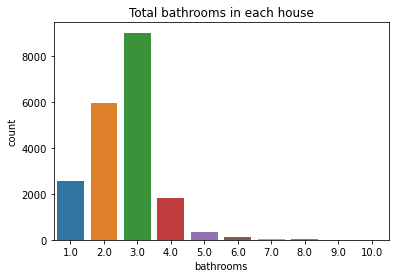

In [18]:
sns.countplot(x=dataviz['bathrooms'].round(),data=dataviz)
plt.title('Total bathrooms in each house')

Text(0.5, 1.0, 'Total bedrooms in each house')

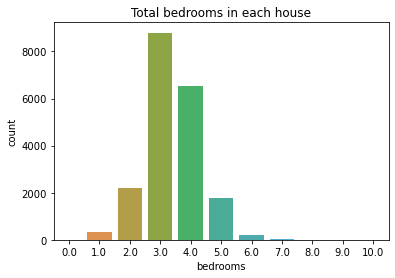

In [19]:
sns.countplot(x=dataviz['bedrooms'].round(),data=dataviz)
plt.title('Total bedrooms in each house')

Text(0.5, 1.0, 'Top 10 brokerage')

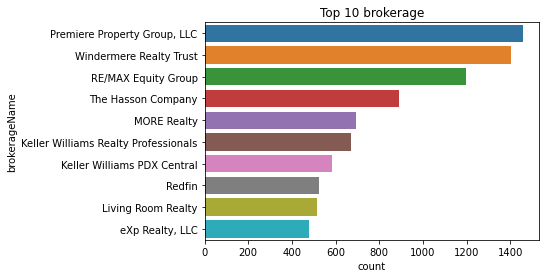

In [20]:
sns.countplot(y='brokerageName',data=dataviz,order=pd.value_counts(dataviz['brokerageName']).iloc[:10].index)
plt.title('Top 10 brokerage')

Text(0.5, 1.0, 'Home Status')

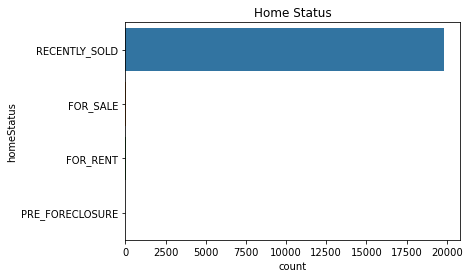

In [21]:
sns.countplot(y='homeStatus',data=dataviz)
plt.title('Home Status')

Text(0.5, 1.0, 'Type of home')

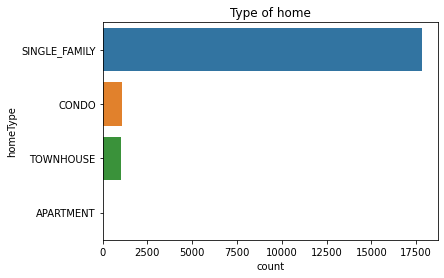

In [22]:
sns.countplot(y='homeType',data=dataviz)
plt.title('Type of home')

Text(0.5, 1.0, 'Type of home')

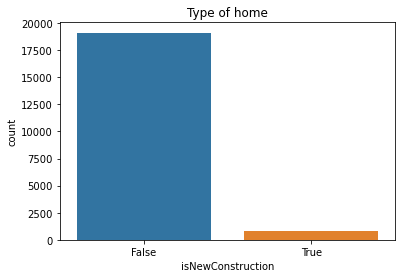

In [23]:
sns.countplot(x='isNewConstruction',data=dataviz)
plt.title('Type of home')

### Prediction Model

In [24]:
model = dataset.copy()

In [25]:
corr_matrix = model.corr()
print(corr_matrix.price.sort_values(ascending=False))

price                    1.000000
lastSoldPrice            0.994587
taxAssessedValue         0.862027
livingArea               0.763574
bathrooms                0.575752
bedrooms                 0.433366
interiorFeatures         0.414810
avgSchoolsRating         0.402885
roomArea                 0.375683
parking                  0.337574
roomFeatures             0.319637
pricePerSquareFoot       0.291705
hasFireplace             0.240815
hasView                  0.235566
hasSpa                   0.235288
lotSize                  0.186732
otherFeatures            0.178132
hasCooling               0.160259
avgSchoolsDistance       0.125437
basement                 0.089460
hasOpenParking           0.069280
avgStudentsPerTeacher    0.013749
yearBuilt                0.009674
hasHomeWarranty          0.001955
hasGarage                0.001066
Unnamed: 0              -0.000998
zipcode                 -0.010991
hasLandLease            -0.014056
fencing                 -0.033342
postingIsRenta

In [26]:
X = model[['taxAssessedValue','livingArea','bathrooms','bedrooms',
         'interiorFeatures','avgSchoolsRating','roomArea',
         'parking','roomFeatures']]
y = model['price']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [29]:
std = StandardScaler()

In [30]:
X = std.fit_transform(X)

#### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
pred_lr = lr.predict(X_test)
score_lr = lr.score(X_train,y_train)

In [35]:
print(score_lr)

0.7808522434063256


In [36]:
lr.coef_[0]

0.7355065569630596

In [37]:
lr.intercept_

-24955.57719901367

In [38]:
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)

In [39]:
print('Mae_lr: ',mae_lr)
print('Mse_lr: ',mse_lr)
print('Rmse_lr: ',rmse_lr)

Mae_lr:  92090.9319124362
Mse_lr:  29674277610.920494
Rmse_lr:  172262.2350108128


In [40]:
preco_lr = df['price']
predict_lr = pd.Series(pred_lr)
error_lr = preco_lr-predict_lr
data_lr = {'Price':preco_lr,'Predictions':predict_lr,'Error':error_lr}
data_prev_lr = pd.DataFrame(data_lr)
data_prev_lr['Percentage_error'] = np.abs(data_prev_lr['Error'])*100/data_prev_lr['Price']
data_prev_lr.head()

,Price,Predictions,Error,Percentage_error
0,315400,460395.839924,-144995.839924,45.972048
1,400000,473507.903473,-73507.903473,18.376976
2,512000,568329.785141,-56329.785141,11.001911
3,348000,377729.259592,-29729.259592,8.542891
4,510000,572986.443011,-62986.443011,12.350283


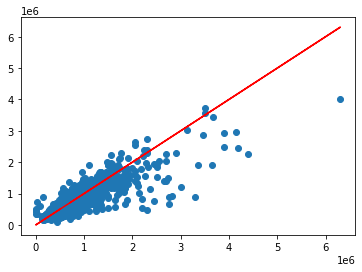

In [41]:
plt.scatter(y_test,pred_lr)
plt.plot(y_test,y_test,color='red')

#### RandomForest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rfr = RandomForestRegressor(n_estimators=200)

In [44]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [45]:
score_rfr = rfr.score(X_train,y_train)
prev_rfr = rfr.predict(X_test)
mae_rfr = mean_absolute_error(y_test,prev_rfr)
mse_rfr = mean_squared_error(y_test,prev_rfr)
rmse_rfr = np.sqrt(mean_squared_error(y_test,prev_rfr))

In [46]:
print('Mae: ',mae_rfr)
print('Mse: ',mse_rfr)
print('Rmse: ',rmse_rfr)

Mae:  78868.43794369823
Mse:  23269096869.667427
Rmse:  152542.11506881446


In [47]:
print(score_rfr)

0.9743836554516216


In [48]:
preco_rfr = df['price']
predict_rfr = pd.Series(prev_rfr)
error_rfr = preco_rfr-predict_rfr
data_rfr = {'Price':preco_rfr,'Predictions':predict_rfr,'Error':error_rfr}
data_prev_rfr = pd.DataFrame(data_rfr)
data_prev_rfr['Percentage_error'] = np.abs(data_prev_rfr['Error'])*100/data_prev_rfr['Price']
data_prev_rfr.head()

,Price,Predictions,Error,Percentage_error
0,315400,478231.245000,-162831.245000,51.626901
1,400000,433778.245000,-33778.245000,8.444561
2,512000,573950.925000,-61950.925000,12.099790
3,348000,554232.828333,-206232.828333,59.262307
4,510000,619851.800000,-109851.800000,21.539569


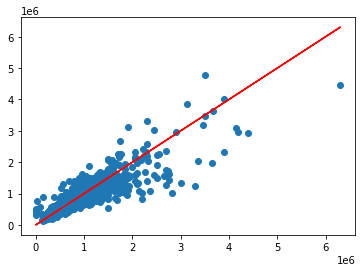

In [49]:
plt.scatter(y_test,prev_rfr)
plt.plot(y_test,y_test,color='red')

#### KNeighbors Regressor

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
knr = KNeighborsRegressor(n_neighbors = 10)

In [52]:
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [53]:
score_knr = knr.score(X_train,y_train)

In [54]:
print(score_knr)

0.8244232987930834


In [55]:
pred_knr = knr.predict(X_test)

In [56]:
mae_knr = mean_absolute_error(y_test,pred_knr)
mse_knr = mean_squared_error(y_test,pred_knr)
rmse_knr = np.sqrt(mse_knr)

In [57]:
print('Mae_knr: ',mae_knr)
print('Mse_knr: ',mse_knr)
print('Rmse_knr: ',rmse_knr)

Mae_knr:  86129.16525321545
Mse_knr:  30046880361.921387
Rmse_knr:  173340.35987594287


In [58]:
price_knr = df['price']
predict_knr = pd.Series(pred_knr)
error_knr = price_knr-predict_knr
data_knr = {'Price':price_knr,'Predictions':predict_knr,'Error':error_knr}
data_prev_knr = pd.DataFrame(data_knr)
data_prev_knr['Percentage_error'] = np.abs(data_prev_knr['Error'])*100/data_prev_knr['Price']

In [59]:
data_prev_knr.head()

,Price,Predictions,Error,Percentage_error
0,315400,476675.0,-161275.0,51.133481
1,400000,453590.0,-53590.0,13.397500
2,512000,634390.0,-122390.0,23.904297
3,348000,520515.8,-172515.8,49.573506
4,510000,602315.0,-92315.0,18.100980


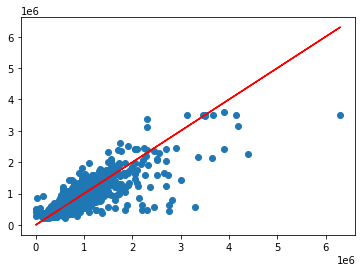

In [60]:
plt.scatter(y_test,pred_knr)
plt.plot(y_test,y_test,color='red')